In [1]:
# Tutorial 1: Simple implementation of QL agent

# Using MountainCar environment in openAI gym, a simple Q-learning agent is
# trained to complete the task. 

In [2]:
import gym
import numpy as np

In [3]:
env = gym.make("MountainCar-v0")

LEARNING_RATE = 0.1 # Alpha
DISCOUNT = 0.95 # Gamma
EPISODES = 20000
SHOW_EVERY = 2000

DISCRETE_OS_SIZE = [20]*len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high-env.observation_space.low)/DISCRETE_OS_SIZE

epsilon = 0.1
START_EPSILON_DECAY = 1
END_EPSILON_DECAY = EPISODES//2

epsilon_decay_value = epsilon/(END_EPSILON_DECAY-START_EPSILON_DECAY)

q_table = np.random.uniform(low=-2, high=0, size = (DISCRETE_OS_SIZE+[env.action_space.n]))

def get_discrete_state(state):
    discrete_state = (state-env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

In [4]:
# For metric measuring
first_ = 0
count_ = 0
ep_rewards = []
aggr_ep_rewards = {'ep':[], 'avg':[], 'min':[], 'max':[]}

for episode in range(EPISODES):
    episode_reward = 0
    if not episode % SHOW_EVERY:
        render = True
    else:
        render = False
    discrete_state = get_discrete_state(env.reset())
    done = False

    while not done:
        
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
        new_state, reward, done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)

        if not done:
            max_future_q = np.max(q_table[new_discrete_state]) # Use max instead of argmax. Want the max value instead of the index
            current_q = q_table[discrete_state + (action, )]
            new_q  = (1-LEARNING_RATE)*(current_q) + (LEARNING_RATE)*(reward + DISCOUNT * max_future_q)
            q_table[discrete_state+(action,)] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state+(action,)] = 0
            count_ += 1 # Goal counter
            if count_ == 1:
                first_ = episode

        discrete_state = new_discrete_state
    if END_EPSILON_DECAY >= episode >= START_EPSILON_DECAY:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(episode_reward)
    
    if render:
        average_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        
        print (f"Episode: {episode}, Avg: {average_reward}, Min: {min(ep_rewards[-SHOW_EVERY:])}, Max: {max(ep_rewards[-SHOW_EVERY:])}.")
    
env.close()

C:\Users\Toffee\AppData\Local\Temp\ipykernel_14196\249826517.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode: 0, Avg: -200.0, Min: -200.0, Max: -200.0.
Episode: 2000, Avg: -194.715, Min: -200.0, Max: -141.0.
Episode: 4000, Avg: -179.4955, Min: -200.0, Max: -115.0.
Episode: 6000, Avg: -166.639, Min: -200.0, Max: -110.0.
Episode: 8000, Avg: -164.569, Min: -200.0, Max: -113.0.
Episode: 10000, Avg: -147.9575, Min: -200.0, Max: -90.0.
Episode: 12000, Avg: -136.8025, Min: -174.0, Max: -90.0.
Episode: 14000, Avg: -138.947, Min: -200.0, Max: -90.0.
Episode: 16000, Avg: -148.482, Min: -200.0, Max: -114.0.
Episode: 18000, Avg: -142.6105, Min: -196.0, Max: -116.0.


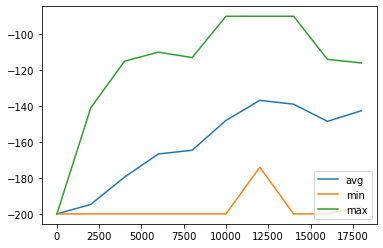

In [5]:
import matplotlib.pyplot as plt

plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label = "avg")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label = "min")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label = "max")
plt.legend(loc=4)
plt.show()